# Effect of feed for linear feed

In this notebook we explore the effect of different feed rates on the process output. We just use $q_P^G$ as estimator for the production rate and we use the improved solving alghoritm from model_lin to speed up calculations.

In [1]:
import scripts.model_lin as model_lin
import scripts.plot_results as plot_results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import os
import pickle

plt.rc('font', size=14)

First we calculate the effects of sevaral feed changes. In this case we keep the feed concentration constant over the whole process and change the feed rate. We keep the starvation length fixed for processes without starvation and with one or two starvation phases. Phase/feed changes are allowed after 5, 10, 14, 18, 13, 27, and 31 h. Starvation reduced feed changes as the feed rate for starvation remains constant.

In [2]:
# models:
# control
# starv 27-35
# starv 18-23, 27-35
# feed change at 5, 10, 14, 18, 23, 27 and 31
# starvation the same as preceding growth

max_cX = 40

with open("data/parameters.p", "rb") as file:
    parameter = pickle.load(file)

for dir in ["plots/feed_changes"]:
    if not os.path.exists(dir):
        os.makedirs(dir)

In [3]:
def calc_control(x):
    f0 = 330
    f1 = x[0]
    f2 = x[1]
    f3 = x[2]
    f4 = x[3]
    f5 = x[4]
    f6 = x[5]
    f7 = x[6]
    
    feed_rate = 1 / 70

    phase_profile = [
        ("growth", 5, f0, feed_rate),
        ("growth", 10, f1, feed_rate),
        ("growth", 14, f2, feed_rate),
        ("growth", 18, f3, feed_rate),
        ("growth", 23, f4, feed_rate),
        ("growth", 27, f5, feed_rate),
        ("growth", 31, f6, feed_rate),
        ("growth", 35, f7, feed_rate), 
    ]

    mod = model_lin.Model(phase_profile=phase_profile, **parameter)
    mod.calc()
    return mod


def f_control(x):
    mod = calc_control(x)
    X, P = mod.calc_X_P_end()
    return -P


def cons_cX(x):
    mod = calc_control(x)
    switch_results = pd.DataFrame(mod.switch_results, columns=("t", "X", "P"))
    switch_results["V"] = mod.V0 + switch_results.t / 70
    return max_cX - (switch_results.X / switch_results.V).max()


cons = {"type": "ineq", "fun": cons_cX}

# opt_control = scipy.optimize.minimize(
#     fun=f_control, x0=[330] * 7, bounds=[(100, 600)] * 7, constraints=cons
# )

opt_control = scipy.optimize.basinhopping(
    func=f_control,
    x0=[330] * 7,
    minimizer_kwargs={"bounds": [(100, 600)] * 7, "constraints": cons},
)
opt_control


                        fun: -3.0733396733464207
 lowest_optimization_result:      fun: -3.0733396733464207
     jac: array([-0.00081414, -0.00071734, -0.00093618, -0.00144774, -0.00152975,
       -0.00180349, -0.00218582])
 message: 'Optimization terminated successfully'
    nfev: 17
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([211.44923216, 256.27090601, 280.63989781, 318.85583258,
       340.59054017, 383.49057448, 419.82695181])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2978
                        nit: 100
                       njev: 371
                          x: array([211.44923216, 256.27090601, 280.63989781, 318.85583258,
       340.59054017, 383.49057448, 419.82695181])

In [4]:
def calc_1starv(x):
    f0 = 330
    f1 = x[0]
    f2 = x[1]
    f3 = x[2]
    f4 = x[3]
    f5 = x[4]
    feed_rate = 1 / 70

    phase_profile = [
        ("growth", 5, f0, feed_rate),
        ("growth", 10, f1, feed_rate),
        ("growth", 14, f2, feed_rate),
        ("growth", 18, f3, feed_rate),
        ("growth", 23, f4, feed_rate),
        ("growth", 27, f5, feed_rate),
        ("starvation", 35, f5, feed_rate),
    ]

    mod = model_lin.Model(phase_profile=phase_profile, **parameter)
    mod.calc()
    return mod


def f_1starv(x):
    mod = calc_1starv(x)
    X, P = mod.calc_X_P_end()
    return -P


def cons_cX(x):
    mod = calc_1starv(x)
    switch_results = pd.DataFrame(mod.switch_results, columns=("t", "X", "P"))
    switch_results["V"] = mod.V0 + switch_results.t / 70
    return max_cX - (switch_results.X / switch_results.V).max()


cons = {"type": "ineq", "fun": cons_cX}

# opt_1starv = scipy.optimize.minimize(
#     fun=f_1starv, x0=[330] * 5, bounds=[(100, 600)] * 5, constraints=cons
# )

opt_1starv = scipy.optimize.basinhopping(
    func=f_1starv,
    x0=[330] * 5,
    minimizer_kwargs={"bounds": [(100, 600)] * 5, "constraints": cons},
)

opt_1starv

                        fun: -4.004036275290357
 lowest_optimization_result:      fun: -4.004036275290357
     jac: array([-0.00122166, -0.00118935, -0.00149953, -0.00231308, -0.0045768 ])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([181.77990731, 207.89782272, 223.35928741, 249.47423774,
       600.        ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4193
                        nit: 100
                       njev: 697
                          x: array([181.77990731, 207.89782272, 223.35928741, 249.47423774,
       600.        ])

In [5]:
def calc_2starv(x):
    f0 = 330
    f1 = x[0]
    f2 = x[1]
    f3 = x[2]
    f4 = x[3]
    feed_rate = 1 / 70

    phase_profile = [
        ("growth", 5, f0, feed_rate),
        ("growth", 10, f1, feed_rate),
        ("growth", 14, f2, feed_rate),
        ("growth", 18, f3, feed_rate),
        ("starvation", 23, f3, feed_rate),
        ("growth", 27, f4, feed_rate),
        ("starvation", 35, f4, feed_rate),
    ]

    mod = model_lin.Model(phase_profile=phase_profile, **parameter)
    mod.calc()
    return mod


def f_2starv(x):
    mod = calc_2starv(x)
    X, P = mod.calc_X_P_end()
    return -P


def cons_cX(x):
    mod = calc_2starv(x)
    switch_results = pd.DataFrame(mod.switch_results, columns=("t", "X", "P"))
    switch_results["V"] = mod.V0 + switch_results.t / 70
    return max_cX - (switch_results.X / switch_results.V).max()


cons = {"type": "ineq", "fun": cons_cX}

# opt_2starv = scipy.optimize.minimize(
#     fun=f_2starv, x0=[330] * 4, bounds=[(100, 600)] * 4, constraints=cons
# )
# opt_2starv

opt_2starv = scipy.optimize.basinhopping(
    func=f_2starv,
    x0=[330] * 4,
    minimizer_kwargs={"bounds": [(100, 600)] * 4, "constraints": cons},
)
opt_2starv

                        fun: -4.505574685294434
 lowest_optimization_result:      fun: -4.505574685294434
     jac: array([-0.00205743, -0.00189489, -0.00307375, -0.00457668])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([136.37164316, 158.28998888, 406.16121289, 600.        ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1811
                        nit: 100
                       njev: 358
                          x: array([136.37164316, 158.28998888, 406.16121289, 600.        ])

In [6]:
model_c = model_lin.Model(**parameter)
model_c.calc()

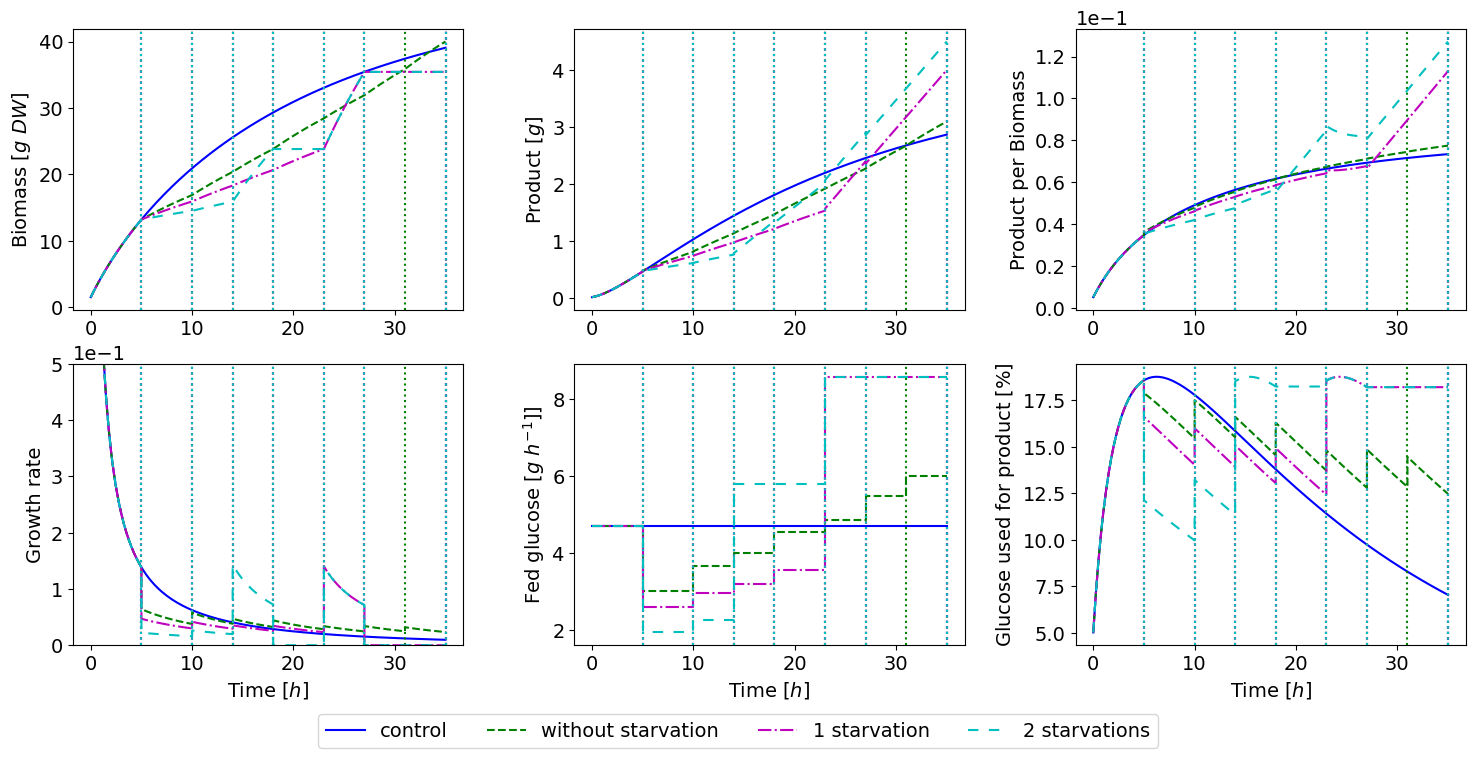

In [7]:
plot_results.plot_results(
    model_c,
    calc_control(opt_control.x),
    calc_1starv(opt_1starv.x),
    calc_2starv(opt_2starv.x),
    "control",
    "without starvation",
    "1 starvation",
    "2 starvations",
    filename="plots/feed_changes/variable_feed.png",
)


In [8]:
model_c = model_lin.Model(**parameter)

In [9]:
# calculate improvements

def calc_parameters(model):
    model.calc()
    t = model.results.index[-1] + 9
    X = model.results.X.iloc[-1]
    P = model.results.P.iloc[-1]
    G = 0
    t0 = 0
    for _, t_end, cf, f in model.phase_profile:
        G += (t_end-t0) * cf * f
        t0 = t_end
    titer = P
    rate = P / t
    glucose_yield = P / G
    P_per_X = P / X
    return np.array((titer, rate, glucose_yield, P_per_X))

results_control = calc_parameters(model_c)
results_0_starv = calc_parameters(calc_control(opt_control.x))
results_1_starv = calc_parameters(calc_1starv(opt_1starv.x))
results_2_starv = calc_parameters(calc_2starv(opt_2starv.x))


In [10]:
(results_0_starv / results_control - 1) * 100

array([ 8.0563093 ,  8.0563093 , 13.20389316,  5.52587254])

In [11]:
(results_1_starv / results_control - 1) * 100

array([39.63480958, 39.63480958, 26.67851329, 53.96034312])

In [12]:
(results_2_starv / results_control - 1) * 100

array([57.12521565, 57.12521565, 31.31220288, 73.24513916])

## Time dependence

To see the effect of process length, we allow one change in feed concentration and optimize the model for each time point. With this we see how the process parameters change over time with zero, one, or two starvation phases.

In [13]:
# time dependence
# control
# without starvation 1 feed change
# 1 starvation, 1 feed change
# 2 starvation, 1 feed change
# effect on titer, rate, yield and product/biomass

In [14]:
def opt_length_fixed_starvation(x, process_length, length_s1, length_s2):
    t_s1 = length_s1
    t_f2 = x[0]
    t_s2 = length_s2
    c_f2 = x[1]
    t_f1 = process_length - t_s1 - t_f2 - t_s2
    feed_rate = 0.5 / process_length
    c_f1 = 330 / 70 / feed_rate

    phase_profile = [
        ("growth", t_f1, c_f1, feed_rate),
        ("starvation", t_f1 + t_s1, c_f1, feed_rate),
        ("growth", t_f1 + t_s1 + t_f2, c_f2, feed_rate),
        ("starvation", process_length, c_f2, feed_rate),
    ]
    mod = model_lin.Model(
        **parameter, phase_profile=phase_profile
    )
    return mod

def f(x, t, length_s1,length_s2):
    mod = opt_length_fixed_starvation(x, t, length_s1, length_s2)
    X, P = mod.calc_X_P_end()
    return -P

def const(x, t, length_s1,length_s2):
    mod = opt_length_fixed_starvation(x, t, length_s1, length_s2)
    mod.calc_X_P_end()
    switch_results = pd.DataFrame(mod.switch_results, columns=("t", "X", "P"))
    switch_results["V"] = mod.V0 + switch_results.t / t / 2
    return max_cX - (switch_results.X / switch_results.V).max()

In [15]:
def optimize(t, args, max_growth):
    cons = {"type": "ineq", "fun": const, 'args': args}
    opt = scipy.optimize.minimize(
        fun=f,
        x0=(5, 500),
        bounds=[(4, max_growth), (300, 600)],
        constraints=cons,
        args=args,
        method='SLSQP',
    )
    if opt.success:
        return calc_parameters(opt_length_fixed_starvation(opt.x, *args))
    else:
        print(t, args)


results_0_starv = list()
results_1_starv = list()
results_2_starv = list()
for t in np.linspace(17, 40, 47):
    args = (t, 0, 0)
    opt = optimize(t, args, t)
    if opt is not None:  ## We ignore results where optimization fails.
        titer, rate, glucose_yield, P_per_X = opt
        results_0_starv.append((t, titer, rate, glucose_yield, P_per_X))

    args = (t, 0, 8)
    opt = optimize(t, args, t-8)
    if opt is not None:
        titer, rate, glucose_yield, P_per_X = opt
        results_1_starv.append((t, titer, rate, glucose_yield, P_per_X))

    args = (t, 5, 8)
    opt = optimize(t, args, t-13)
    if opt is not None:
        titer, rate, glucose_yield, P_per_X = opt
        results_2_starv.append((t, titer, rate, glucose_yield, P_per_X))


results_0_starv = pd.DataFrame(
    results_0_starv, columns=("t", "titer", "rate", "glucose_yield", "P_per_X")
).set_index("t")

results_1_starv = pd.DataFrame(
    results_1_starv, columns=("t", "titer", "rate", "glucose_yield", "P_per_X")
).set_index("t")

results_2_starv = pd.DataFrame(
    results_2_starv, columns=("t", "titer", "rate", "glucose_yield", "P_per_X")
).set_index("t")

/home/gschloegel/.conda/envs/pDNA_model/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx
/home/gschloegel/.conda/envs/pDNA_model/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


17.0 (17.0, 5, 8)
19.0 (19.0, 5, 8)
20.0 (20.0, 5, 8)
38.0 (38.0, 0, 0)
38.5 (38.5, 0, 0)
39.0 (39.0, 0, 0)
39.5 (39.5, 0, 0)
39.5 (39.5, 0, 8)
40.0 (40.0, 0, 0)
40.0 (40.0, 0, 8)


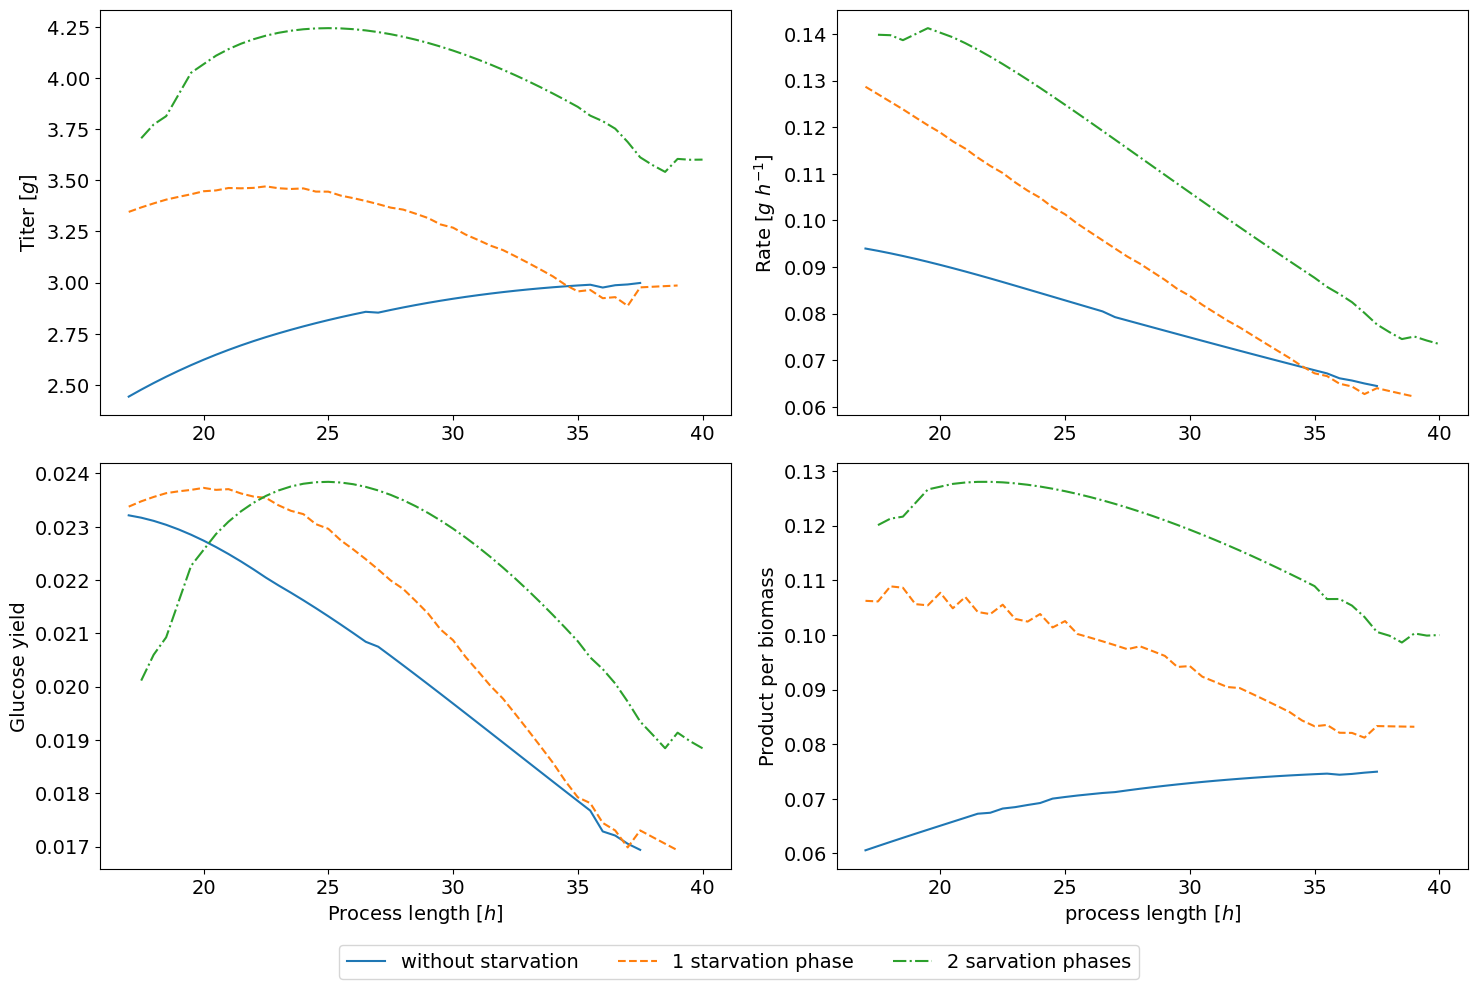

In [16]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))
for r, label, style in zip(
    (results_0_starv, results_1_starv, results_2_starv),
    ("without starvation", "1 starvation phase", "2 sarvation phases"),
    ("-", "--", "-.", ":")
):
    ax0.plot(r.titer, label=label, ls=style)
    ax1.plot(r.rate, ls=style)
    ax2.plot(r.glucose_yield, ls=style)
    ax3.plot(r.P_per_X, ls=style)

ax2.set_xlabel("Process length $[h]$")
ax3.set_xlabel("process length $[h]$")
ax0.set_ylabel("Titer $[g]$")
ax1.set_ylabel("Rate $[g \\ h^{-1}]$")
ax2.set_ylabel("Glucose yield")
ax3.set_ylabel("Product per biomass")

fig.tight_layout()
# ax0.get_legend().remove()
fig.subplots_adjust(bottom=0.12)
fig.legend(loc="lower center", ncol=3)

plt.savefig('plots/feed_changes/time_effect.png', bbox_inches='tight')
plt.show()


Now we look at the process with optimal process length. While there is a maximum in titer for one or two starvation phases we use a precess of similar lenght without starvation as comparison.

In [17]:
def optimize(t, args, max_growth):
    cons = {"type": "ineq", "fun": const, 'args': args}
    opt = scipy.optimize.minimize(
        fun=f,
        x0=(5, 500),
        bounds=[(4, max_growth), (300, 600)],
        constraints=cons,
        args=args,
        method='SLSQP',
        options={'ftol': 1e-10}
    )
    return calc_parameters(opt_length_fixed_starvation(opt.x, *args))

args = (25, 5, 8)
cons = {"type": "ineq", "fun": const, 'args': args}

opt2 = scipy.optimize.minimize(
    fun=f,
    x0=(5, 550),
    bounds=[(4, t - 13), (300, 600)],
    constraints=cons,
    args=args,
    method="SLSQP",
)
opt2


     fun: -4.2434589248113825
     jac: array([-0.1184026 , -0.00574934])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([  4.        , 486.22959859])

In [18]:
mod2 = opt_length_fixed_starvation(opt2.x, *args)
mod2.calc()

In [19]:
args = (24, 0, 8)
cons = {"type": "ineq", "fun": const, 'args': args}

opt1 = scipy.optimize.minimize(
    fun=f,
    x0=(5, 550),
    bounds=[(4, t - 13), (300, 600)],
    constraints=cons,
    args=args,
    method="SLSQP",
)
opt1

     fun: -3.460489024851551
     jac: array([-0.06118372, -0.00688207])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([  4.        , 369.40708428])

In [20]:
mod1 = opt_length_fixed_starvation(opt1.x, *args)
mod1.calc()

In [21]:
args = (25, 0, 0)
cons = {"type": "ineq", "fun": const, 'args': args}

opt0 = scipy.optimize.minimize(
    fun=f,
    x0=(5, 550),
    bounds=[(4, t - 13), (300, 600)],
    constraints=cons,
    args=args,
    method="SLSQP",
)
opt0

     fun: -2.817140953145636
     jac: array([-0.03763419, -0.00567138])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([  9.19797559, 313.2857357 ])

In [22]:
mod0 = opt_length_fixed_starvation(opt0.x, *args)
mod0.calc()

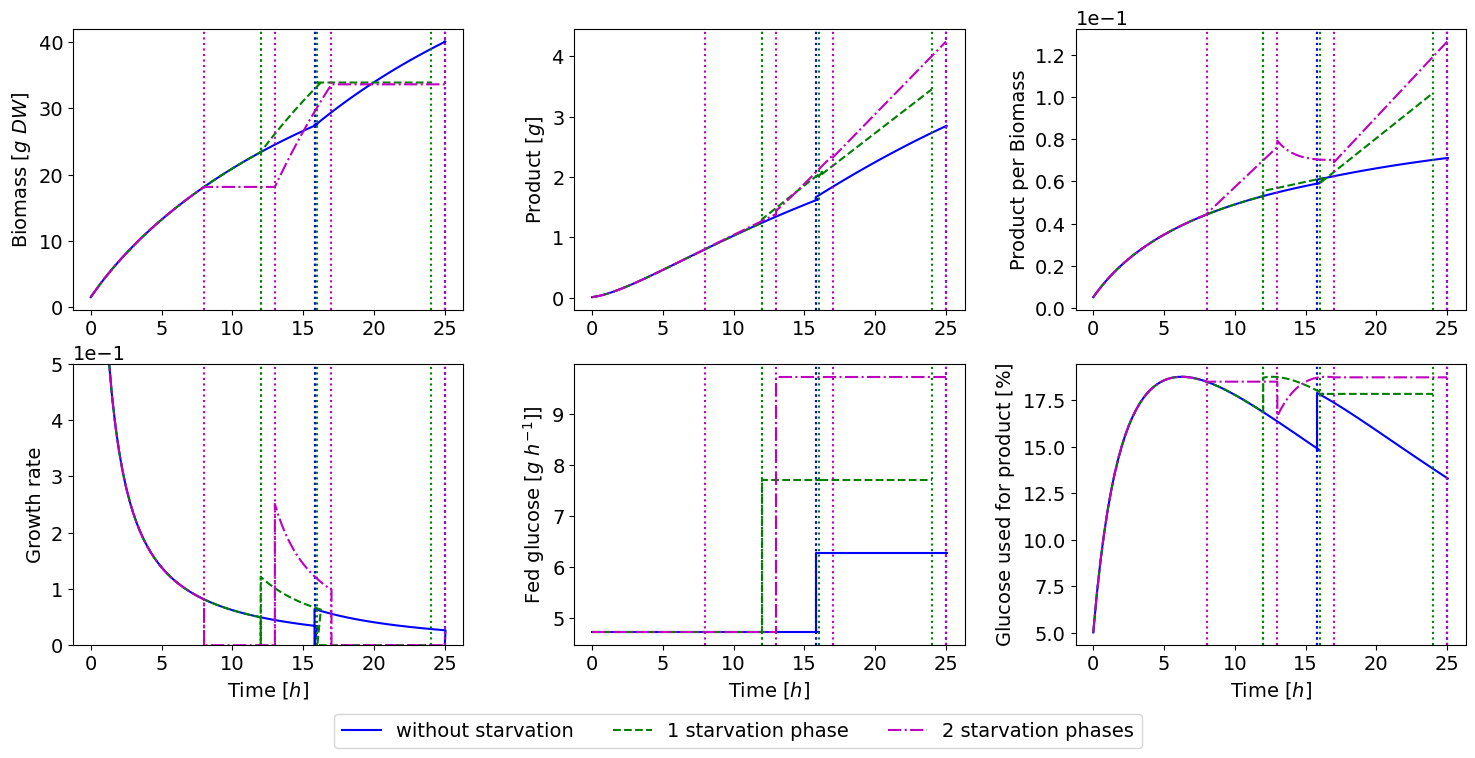

In [23]:
mod = opt_length_fixed_starvation(opt0.x, *args)
mod.calc()
plot_results.plot_results(mod0, mod1, mod2, "without starvation", "1 starvation phase", "2 starvation phases", filename='plots/feed_changes/23h_process.png')

In [24]:
(calc_parameters(mod0) / results_control - 1) * 100

array([-1.75639942, 27.13877722, 22.68632319, -4.18973813])

In [25]:
(calc_parameters(mod1) / results_control - 1) * 100

array([20.38959807, 60.51946409, 33.38609249, 38.83143235])

In [26]:
(calc_parameters(mod2) / results_control - 1) * 100

array([47.98431837, 91.50911789, 37.19125922, 72.04625845])

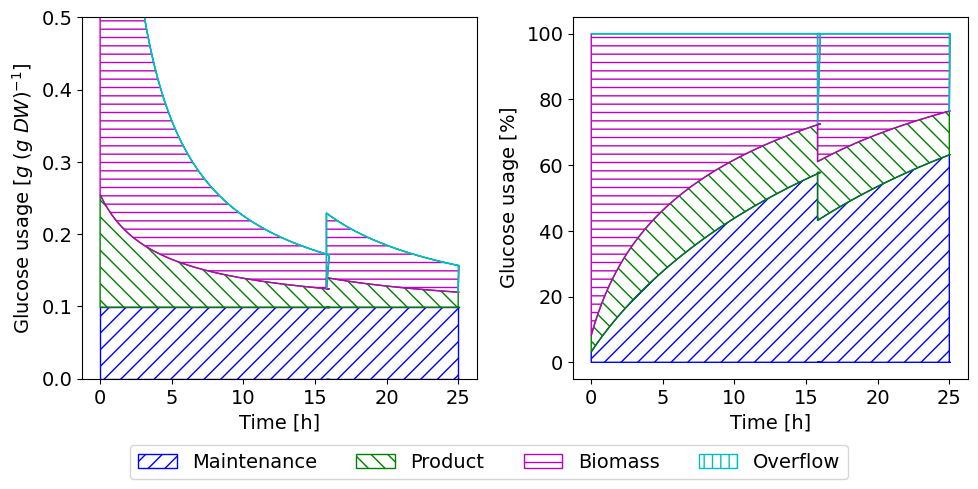

In [27]:
plot_results.energy_usage(mod0)

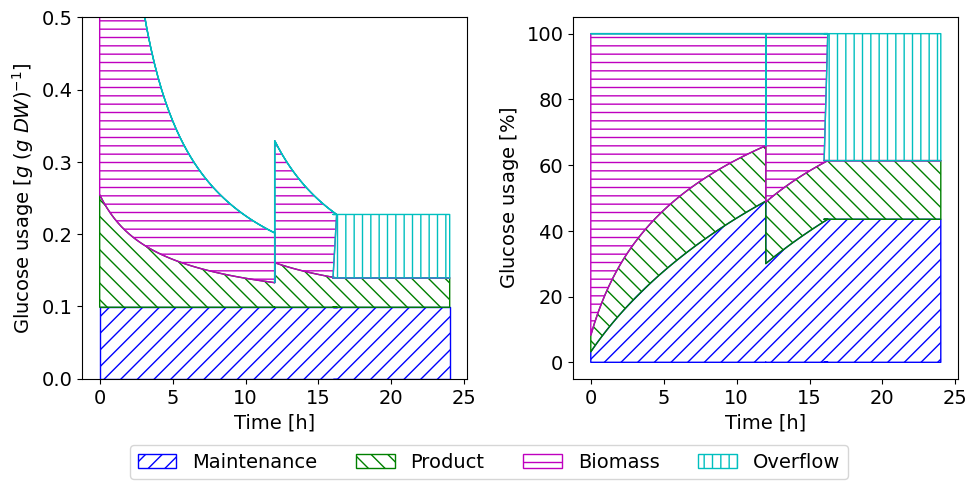

In [28]:
plot_results.energy_usage(mod1)

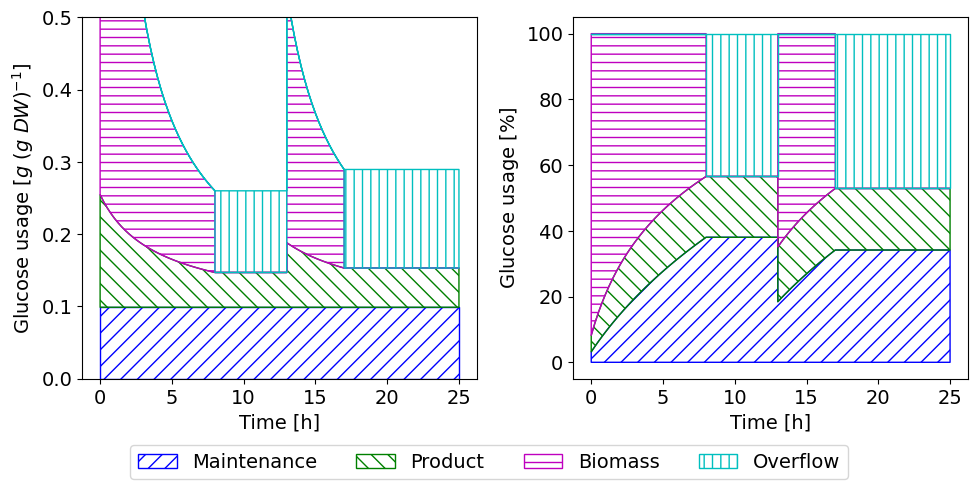

In [29]:
plot_results.energy_usage(mod2)

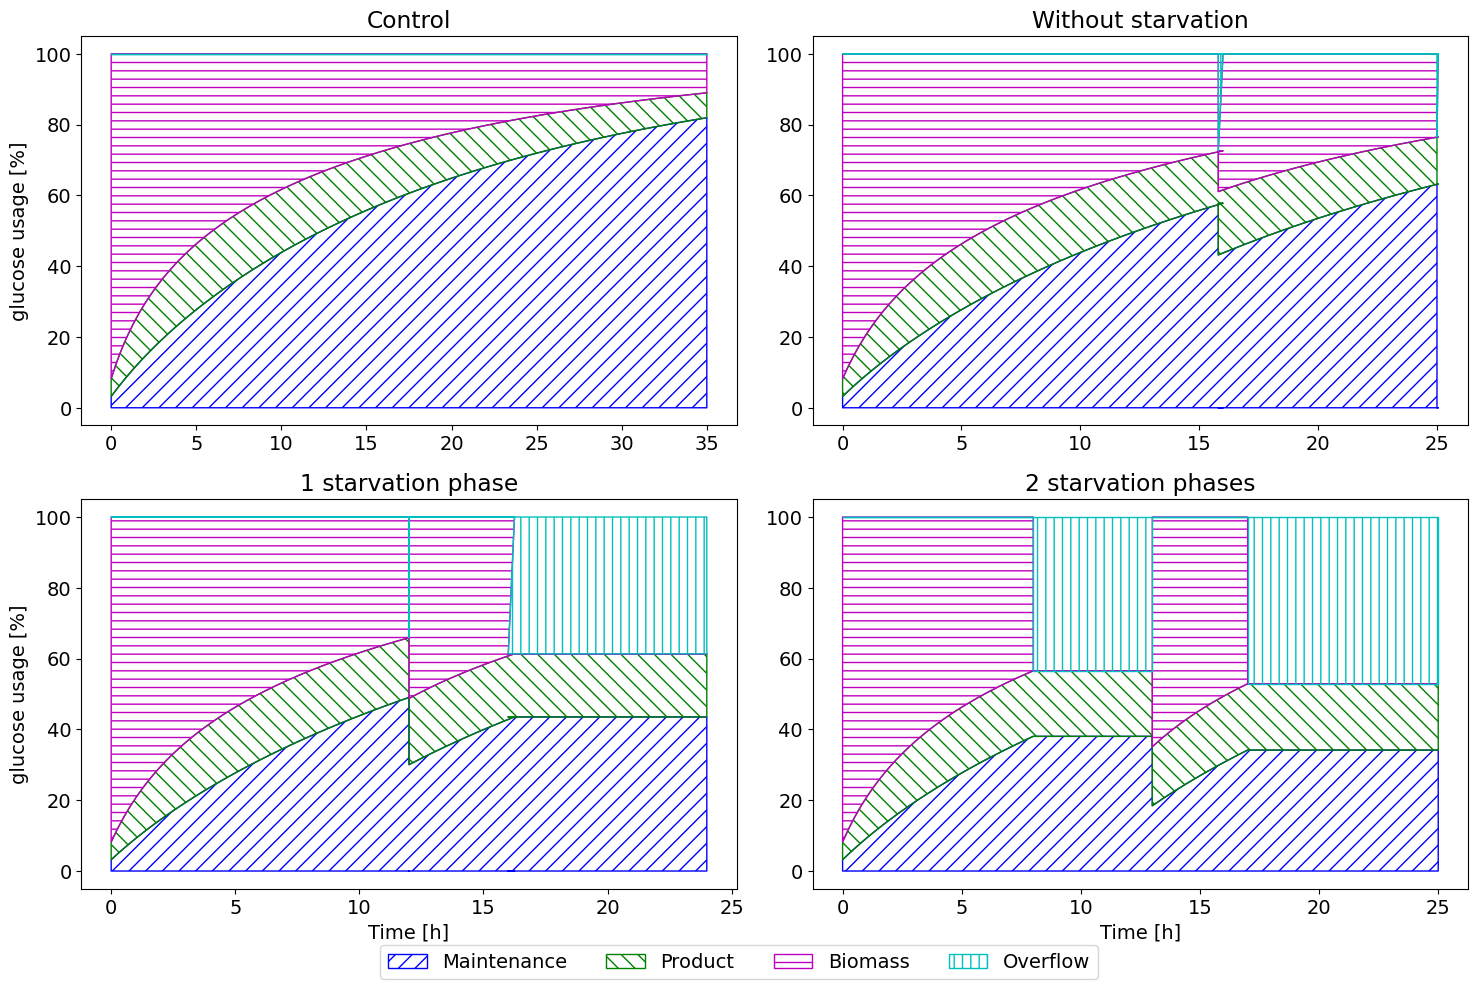

In [30]:
plot_results.energy_usage(
    model_c,
    mod0,
    mod1,
    mod2,
    percent_only=True,
    model_titels=['Control', 'Without starvation', '1 starvation phase', '2 starvation phases'],
    filename="plots/feed_changes/energy.png"
)